<a href="https://www.kaggle.com/code/okolinnamdinnaemeka/tiktok-google-play-review-analysis?scriptVersionId=149872500" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS
import emoji
import plotly.graph_objs as go
from plotly.offline import iplot
import string
from textblob import TextBlob
# importing filterwarnings to ignore warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

Loading Csv

In [2]:
tiktok_review = pd.read_csv("/kaggle/input/tiktok-google-play-store-review/tiktok_google_play_reviews.csv")
df = tiktok_review.copy()

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


Removing missing values

In [4]:
df['content'].isnull().sum()

31

In [5]:
df= df.dropna(subset = ['content'])

In [6]:
df.shape

(460256, 10)

Performing Sentiment Analysis

In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


polarity = [-1,1)

A negative polarity(-1) is a negative sentiment A positive polarity(1) is a postive sentiment A neutral polarity(0) is a neutral sentiment

In [8]:
#polarity of the first content
TextBlob("No words").sentiment.polarity

0.0

In [9]:
#Creating a loop for polarity of all in content
polarity = []


for comment in df['content']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [10]:
len(polarity)



460256

In [11]:
# rounding up the polarity then converting back to a float
polarity_rounded = ['%.0f' % elem for elem in polarity] 
polarity_rounded = list(map(float,polarity_rounded))
df['polarity']=polarity_rounded

In [12]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,polarity
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN,0.0
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN,0.0
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN,0.0
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN,1.0
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN,0.0


Wordcloud Analysis

In [13]:
filter1 = df['polarity'] == 1
positive_comments = df[filter1]
positive_comments

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,polarity
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN,1.0
5,08dc9129-a16b-459a-9c58-4d63a0eebd26,Melvin Crawford,https://play-lh.googleusercontent.com/a/ALm5wu...,I love this amazing app,5,0,27.1.3,2022-11-29 21:52:53,NaN,NaN,1.0
12,102df96f-240a-42a9-988c-0c6b85bf1f20,Beautiful Ayaan,https://play-lh.googleusercontent.com/a/ALm5wu...,Good,5,0,NaN,2022-11-29 21:48:49,NaN,NaN,1.0
16,33f9466c-d28b-49f9-ac98-ffb6e5044de1,Tik Toker,https://play-lh.googleusercontent.com/a/ALm5wu...,Very very nice app but my video not going for you,5,0,27.0.3,2022-11-29 21:47:14,NaN,NaN,1.0
18,968a38b1-0e01-458e-a5c9-3ac05b9a1b1a,M Mustaqeem,https://play-lh.googleusercontent.com/a-/ACNPE...,Hi dear tik tik is very good app Android mobil...,5,0,27.0.3,2022-11-29 21:46:39,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
460275,730607d9-8865-47fd-8500-a05899c418fc,Mustakim Ahmed,https://play-lh.googleusercontent.com/a/ALm5wu...,Good,5,0,24.8.3,2022-06-18 12:37:47,NaN,NaN,1.0
460280,b01fa9e8-7304-4b5d-b8a1-f6ed2d93859e,Lee khan Khan,https://play-lh.googleusercontent.com/a/ALm5wu...,Good job,5,0,24.8.3,2022-06-18 12:36:30,NaN,NaN,1.0
460283,16d331c8-ba21-4aeb-ac01-dec455ca48ad,Hiox Softwares,https://play-lh.googleusercontent.com/a/ALm5wu...,Very nice,1,0,NaN,2022-06-18 12:35:25,NaN,NaN,1.0
460284,fbb86777-b885-4f76-b49e-13e424aa5afc,Md. Zahid Hasan,https://play-lh.googleusercontent.com/a-/ACNPE...,Nice,5,0,24.8.3,2022-06-18 12:34:39,NaN,NaN,1.0


In [14]:
filter2 = df['polarity'] == -1
negative_comments = df[filter2]
negative_comments

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,polarity
239,c3eb8233-e295-45e1-9227-5fe8ff30cd16,LiTTle DraCula,https://play-lh.googleusercontent.com/a-/ACNPE...,Worst app i ever seen...,1,0,NaN,2022-11-29 19:14:00,NaN,NaN,-1.0
340,6d3882eb-243a-4345-b4c2-a9e6227ba1d2,mr Marshall gaming,https://play-lh.googleusercontent.com/a-/ACNPE...,This apps is were idiots are born,1,0,NaN,2022-11-29 18:07:41,NaN,NaN,-1.0
403,16b53a01-5224-49e6-a8b5-6eea0de06f3b,MD SIFUL ISLAM,https://play-lh.googleusercontent.com/a-/ACNPE...,Bad,1,0,27.1.3,2022-11-29 17:45:30,NaN,NaN,-1.0
480,ca8b236d-a1bf-44d1-931c-2cbf1ac91dc9,Ash Fran,https://play-lh.googleusercontent.com/a-/ACNPE...,Frustrated that I cannot pin comments or videos,2,0,27.1.3,2022-11-29 17:20:58,NaN,NaN,-1.0
495,3408489e-2aff-4fa2-a770-c6031540c375,Moayad Alhajjeh,https://play-lh.googleusercontent.com/a/ALm5wu...,Bad,1,0,NaN,2022-11-29 17:13:16,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
460021,0e7ed78b-4073-444f-ae6e-30fc625b5620,কাঞ্চন কাঞ্চন,https://play-lh.googleusercontent.com/a-/ACNPE...,Bad ☹️,1,0,24.9.3,2022-06-18 14:08:36,NaN,NaN,-1.0
460075,668fd8ba-b861-4910-9d5b-444b7c6a5921,Abrielle Robertson,https://play-lh.googleusercontent.com/a/ALm5wu...,Bad it wont et me get a emoji to create a pass...,1,0,NaN,2022-06-18 13:48:53,NaN,NaN,-1.0
460143,73db5006-aada-402d-aa27-183dd2762519,Shanaj Akter,https://play-lh.googleusercontent.com/a/ALm5wu...,This app very bad,1,0,NaN,2022-06-18 13:21:22,NaN,NaN,-1.0
460156,ac7dea1c-5d08-4c93-9a6c-a22b621a75b2,Rashida Coleman,https://play-lh.googleusercontent.com/a/ALm5wu...,I hate it!! The fake app keeps lyin,1,0,NaN,2022-06-18 13:17:40,NaN,NaN,-1.0


In [15]:
total_comments_positive=' '.join(positive_comments['content'])
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

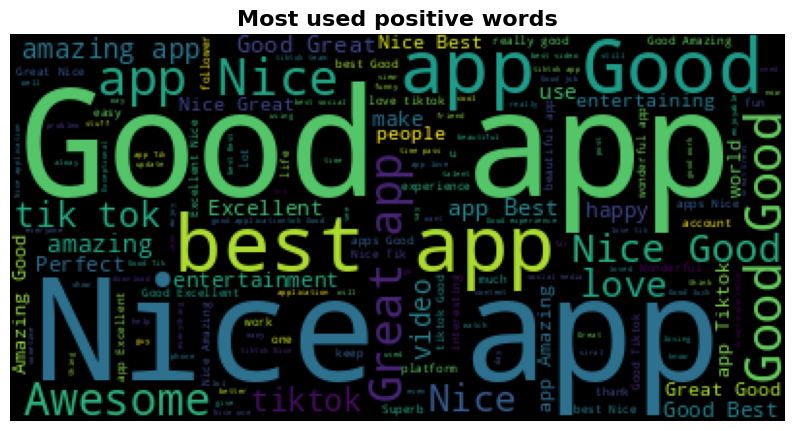

In [16]:
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.title("Most used positive words", fontsize = 16, fontweight = "bold")
plt.axis('off')

In [17]:
total_comments_negative=' '.join(negative_comments['content'])
wordcloud2 = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

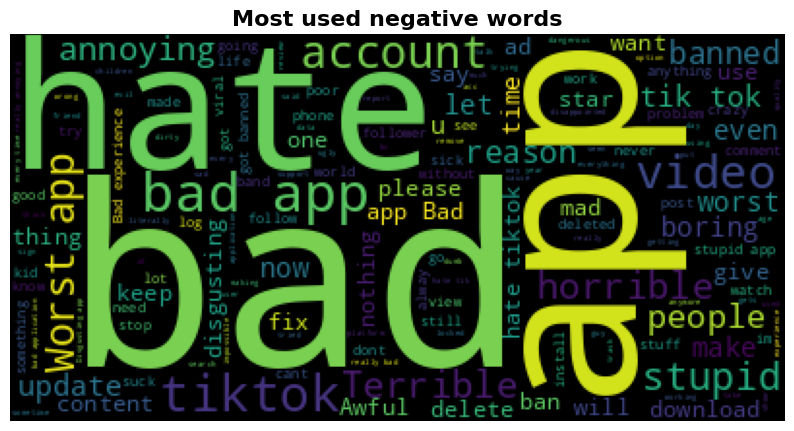

In [18]:
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud2)
plt.title("Most used negative words", fontsize = 16, fontweight = "bold")
plt.axis('off')

Performing Emoji analysis

In [19]:
df['content'].head(20)

0                                              No words
1                                 Great fun app so far!
2     The app would get a higher rating but I litera...
3     I WISH I COULD GIVE THIS A 100 PERCENT RATING ...
4                                   Pictures and record
5                               I love this amazing app
6                                        Mohammed Rehan
7                                Love being on Tik Tok.
8                           Kwai pelo menos da dinheiro
9     Post to view is such a step backwards for the ...
10    I got banned for literally no reason. You guys...
11                                                 Love
12                                                 Good
13                                  I have fun on here.
14    I don't like when it takes so long to load and...
15    I love tik tok but this black out thing is cra...
16    Very very nice app but my video not going for you
17    pee b-4 watching!!! Luv ur site!!! GO... U

In [20]:
comment1 = 'Perfect 🥰'


In [21]:
emoji_list = []
for char in comment1:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

emoji_list

['🥰']

In [22]:
all_emoji_list = []

for comment1 in df['content'].dropna():
    for char in comment1:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

all_emoji_list[:10]

['💕', '😘', '🥰', '🫂', '❤', '♥', '♥', '🤞', '🤞', '🤞']

In [23]:
from collections import Counter
Counter(all_emoji_list).most_common(10)

[('❤', 22942),
 ('👍', 14917),
 ('🥰', 10677),
 ('😍', 9856),
 ('😭', 6997),
 ('🙏', 6460),
 ('😘', 5202),
 ('😊', 5129),
 ('👌', 4577),
 ('♥', 3880)]

In [24]:
Counter(all_emoji_list).most_common(10)[1][0]
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [25]:
Counter(all_emoji_list).most_common(10)[1][1] 
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [26]:
trace = go.Bar(x = emojis , y = freqs)




In [27]:

iplot([trace])

